In [ ]:
!git clone -b fix-jax-compatability https://github.com/google/deluca.git

In [ ]:
%cd deluca

!pip install -e .

This cell creates an LDS environment and plots the signal with random activations.

the eigenvalues of our system: [ 0.9379067   0.9391432  -0.8867083  -0.88125324  0.92279553 -0.89337987
 -0.8875922   0.9275792   0.92987067 -0.8931594   0.93941414 -0.89898866
  0.92560166  0.9225076   0.9359685   0.9373815   0.9333656   0.92902464
  0.9203941  -0.8988939 ]
trajectory length = 1000


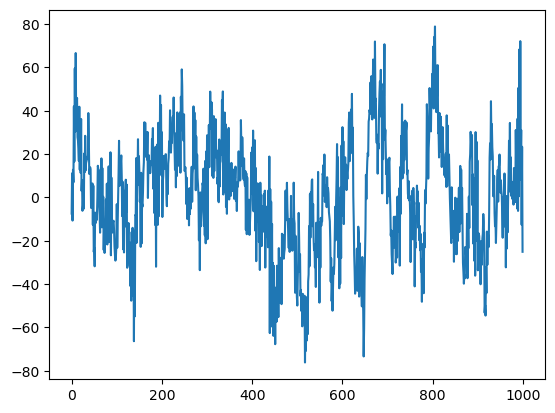

In [8]:
#%load_ext autoreload
#%autoreload 2
import sys
import os
sys.path.append("../../")

import jax
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

from deluca.core import Env
from deluca.core import field
from deluca.envs import _lds as lds



env = lds.LDS() #LDS with random initiations and dimensions as specified
#env = lds.LDS(2,10,3) #LDS with random initiations and dimensions as specified
d_obs = 2
d_action = 2
obs = env.init(d_action,20,d_obs)
env.show_me_the_signal(1000)


Now I'd like to plot the signal with different activations, but instead of a build in function, i want to use agents.

the eigenvalues of our system: [ 0.9379067   0.9391432  -0.8867083  -0.88125324  0.92279553 -0.89337987
 -0.8875922   0.9275792   0.92987067 -0.8931594   0.93941414 -0.89898866
  0.92560166  0.9225076   0.9359685   0.9373815   0.9333656   0.92902464
  0.9203941  -0.8988939 ]


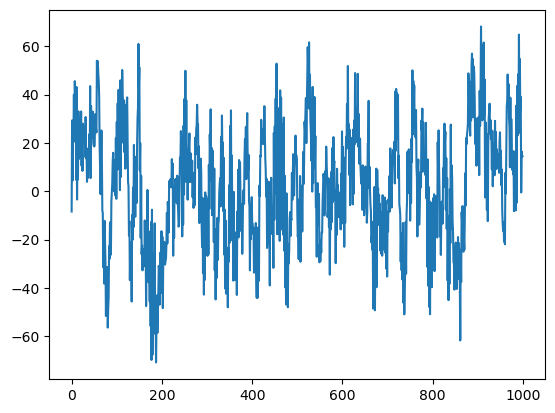

In [12]:
#%load_ext autoreload
#%autoreload 2
from deluca.core import Agent
from deluca.agents import SimpleRandom



def plot_lds_with_random_agent(traj_length = 1000):
  agent = SimpleRandom(d_action)
  agent.init()
  obs = np.zeros(shape = (d_obs,1))
  action = agent(obs)
  losses = np.zeros(traj_length)
  for i in range(traj_length):
    obs = env(action)
    action = agent(obs)
    losses[i] = obs[0,0] # first coordinate of the observation
    agent.update(obs,action)

  plt.plot(losses)
  plt.show()



env = lds.LDS() #LDS with random initiations and dimensions as specified
d_obs = 2
d_action = 2
obs = env.init(d_action,20,d_obs)


plot_lds_with_random_agent()
